In [1]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/User/machine_learning/data/btc_data.csv')
data.head(5)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
data.dtypes

Date              object
priceUSD         float64
transactions       int64
size             float64
sentbyaddress      int64
                  ...   
price3rocUSD     float64
price7rocUSD     float64
price14rocUSD    float64
price30rocUSD    float64
price90rocUSD    float64
Length: 737, dtype: object

In [4]:
data.isna().sum()

Date             0
priceUSD         0
transactions     0
size             0
sentbyaddress    0
                ..
price3rocUSD     0
price7rocUSD     0
price14rocUSD    0
price30rocUSD    0
price90rocUSD    0
Length: 737, dtype: int64

In [5]:
data.fillna(0, inplace=True)

In [6]:
data.describe()
data.columns

Index(['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress',
       'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD',
       ...
       'price3rsiUSD', 'price7rsiUSD', 'price14rsiUSD', 'price30rsiUSD',
       'price90rsiUSD', 'price3rocUSD', 'price7rocUSD', 'price14rocUSD',
       'price30rocUSD', 'price90rocUSD'],
      dtype='object', length=737)

In [7]:
days = []
j = 1
for j in range(len(data)):
    days.append([int(j+1)])
    j=j+1
print(days)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [148], [149], [150], [151], [152], [153], [154], [155], [156], [157], [158], [

In [8]:
price = data.priceUSD * 10000
print(price)

0            495.0
1            726.0
2            859.0
3            783.0
4            767.0
           ...    
3483    93490000.0
3484    93940000.0
3485    93660000.0
3486    93930000.0
3487    93980000.0
Name: priceUSD, Length: 3488, dtype: float64


In [9]:
price = price.astype(np.int64)
print(price)

0            495
1            726
2            859
3            783
4            767
          ...   
3483    93490000
3484    93940000
3485    93660000
3486    93930000
3487    93980000
Name: priceUSD, Length: 3488, dtype: int64


In [10]:
test = days[:-1]
test_p = price[:-1]
lin_svr = SVR(kernel = 'linear', C = 1000)
lin_svr.fit(test, test_p)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
poly_svr = SVR(kernel = 'poly', C = 1000, degree=2)
poly_svr.fit(test, test_p)


SVR(C=1000, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [70]:
day = [[len(days)]]
print('The Poly SVR Predicted Price :', poly_svr.predict(day))
print('The Linear SVR Predicted Price :', lin_svr.predict(day))

seq_len = 2750

The Poly SVR Predicted Price : [44641998.51881681]
The Linear SVR Predicted Price : [42779637.58313319]


svc = SVC()
svc.fit(test, test_p)

print("훈련 세트 정확도: {:.3f}".format(svc.score(test, test_p)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(test, test_p)))

pred = svc.predict(test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(test_p, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [71]:
seq_days = []
seq_prices = []
pre_prices = []
j = 1
for j in range(len(data) - seq_len-1):
    temp_days = []
    seq_prices.append(price[j:j+seq_len])
    pre_prices.append(price[j+seq_len+1])
    for i in range(seq_len):
        temp_days.append(j+i+1)
    seq_days.append(temp_days)
    j=j+1
print(seq_prices)
print(pre_prices)

[0             495
1             726
2             859
3             783
4             767
          ...    
2745    119840000
2746    112170000
2747    108000000
2748    110940000
2749    113840000
Name: priceUSD, Length: 2750, dtype: int64, 1             726
2             859
3             783
4             767
5             649
          ...    
2746    112170000
2747    108000000
2748    110940000
2749    113840000
2750    110850000
Name: priceUSD, Length: 2750, dtype: int64, 2             859
3             783
4             767
5             649
6             566
          ...    
2747    108000000
2748    110940000
2749    113840000
2750    110850000
2751    112940000
Name: priceUSD, Length: 2750, dtype: int64, 3             783
4             767
5             649
6             566
7             581
          ...    
2748    110940000
2749    113840000
2750    110850000
2751    112940000
2752    117100000
Name: priceUSD, Length: 2750, dtype: int64, 4             767
5            

In [72]:
print(seq_days)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [73]:
svc = SVC()
svc.fit(seq_prices, pre_prices)

print("훈련 세트 정확도: {:.3f}".format(svc.score(seq_prices, pre_prices)))

훈련 세트 정확도: 0.028


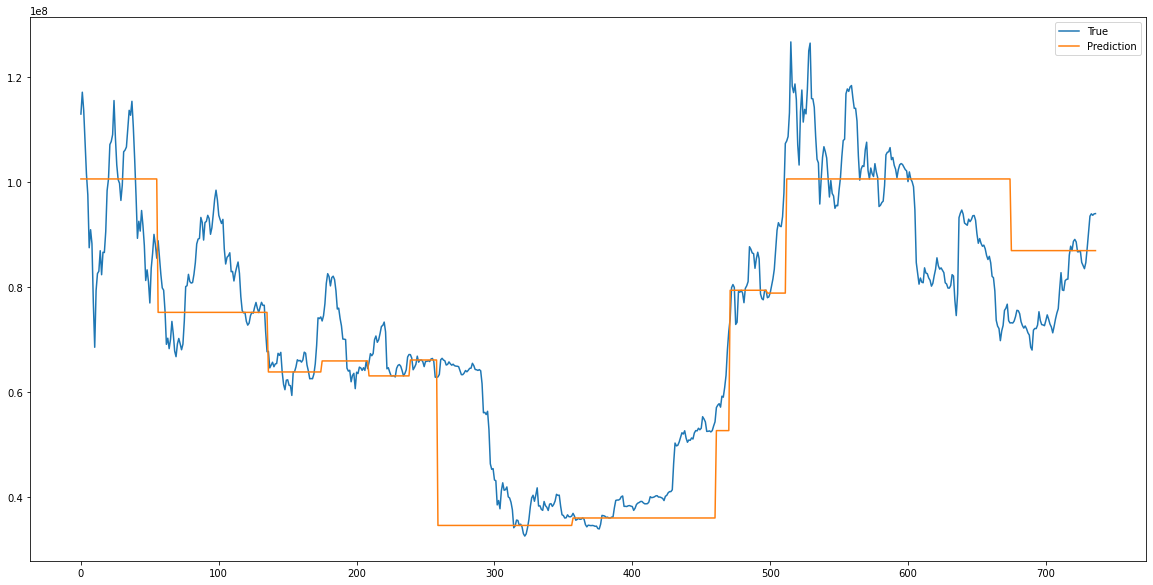

In [74]:
pred = svc.predict(seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

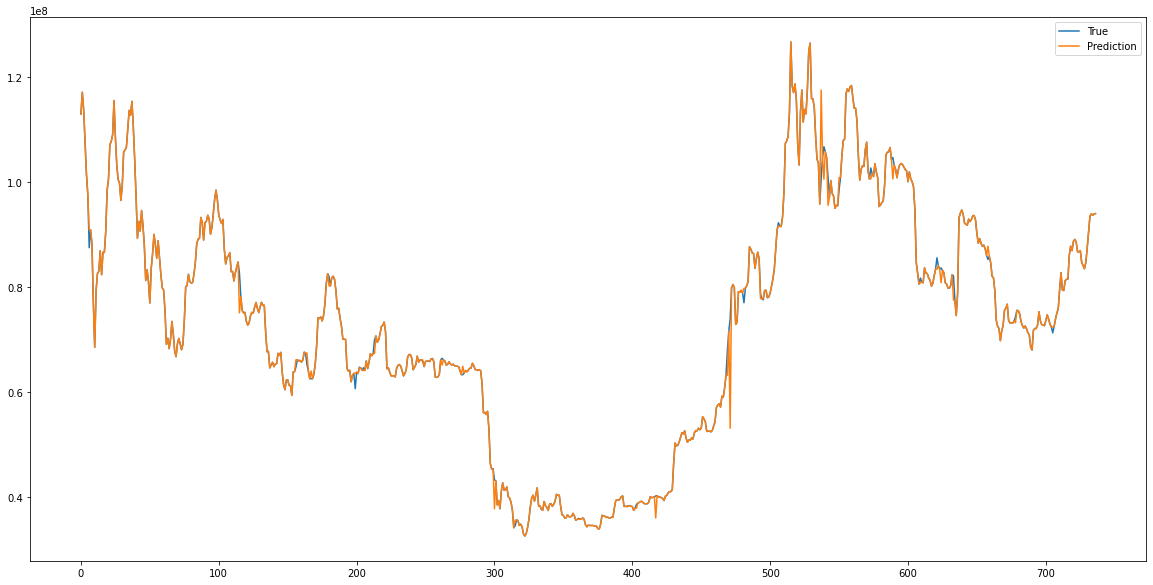

In [75]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=300) 
rfc.fit(seq_prices, pre_prices)

pred = rfc.predict(seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [76]:
print("훈련 세트 정확도: {:.3f}".format(rfc.score(seq_prices, pre_prices)))

훈련 세트 정확도: 0.940


GBC = GradientBoostingClassifier(max_depth=10, n_estimators=100, learning_rate=0.1, random_state=42)
GBC.fit(seq_prices, pre_prices)
pred = GBC.predict(seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

print("훈련 세트 정확도: {:.3f}".format(GBC.score(seq_prices, pre_prices)))

In [77]:
print(pred)

[112940000 117100000 113720000 107810000 101540000  97550000  90910000
  90910000  88260000  77040000  68520000  79330000  82560000  83000000
  86910000  82340000  86620000  86570000  90550000  98380000 100580000
 107130000 107720000 109020000 115510000 108510000 103250000 100460000
  99750000  96490000  99390000 105750000 106070000 106660000 110020000
 113650000 112710000 115370000 110510000 104280000  97240000  89270000
  92520000  90650000  94570000  91700000  87890000  81240000  83270000
  80990000  76960000  83600000  86410000  90020000  88090000  85490000
  88810000  85590000  82360000  79830000  79400000  75480000  69080000
  70250000  68260000  70040000  73450000  71070000  67800000  66730000
  69160000  70200000  69180000  68050000  69120000  73550000  80080000
  80250000  82410000  81040000  80750000  80850000  82420000  84640000
  88200000  89130000  89250000  93250000  92310000  88940000  92280000
  92490000  93650000  93040000  90040000  91280000  93870000  96700000
  9844

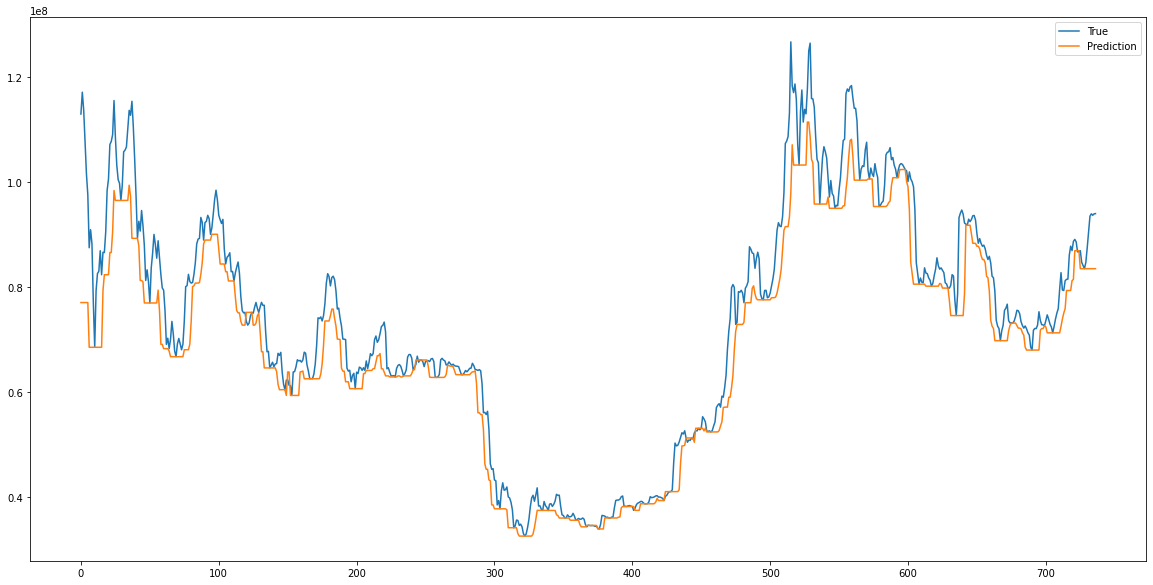

In [86]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(seq_prices, pre_prices)

pred = knn.predict(seq_prices)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(pre_prices, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [87]:
print("훈련 세트 정확도: {:.3f}".format(knn.score(seq_prices, pre_prices)))

훈련 세트 정확도: 0.081
